<a href="https://colab.research.google.com/github/Diogo-Spencer/Mec-nica-dos-S-lidos-1/blob/main/msi_tp01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://userweb.fct.unl.pt/~jmc.xavier/MSI/iLogos/nsst.jpg" width="400" height="100">

# DEMI | NOVA SST

# Mecânica dos Sólidos I

## Trabalho Prático 1
O trabalho prático 1 (TP1) deve ser desenvolvido seguindo o template e enunciado aqui apresentado.
Este está estruturado em 3 pontos:
- [1.](#Ponto1) Elaborar um relatório em formato de código estruturado usando a feramenta computacional Jupyter Notebook/JupyterLab do problema proposto: ensaio de tração de uma placa com furo.
- [2.](#Ponto2) Elaborar o modelo numérico em ANSYS da placa com furo e obter o tensor das tensões em pontos definidos; comparar as soluções numérica e analítica.
- [3.](#Ponto3) Comparar e discutir a evolução dos campos de deformação obtidos por vias analítica, numérica e experimental, em zonas criticas do problema.

***
### Instruções para a entrega do trabalho prático
Elabore o relatório com recurso ao Jupyter Notebook (_*.ipynb_).

O relatório, em conjunto com o ficheiro ANSYS (_*.mac_), deve ser enviado até ao dia **06-05-2022** (23h55) através do [recurso Moodle](https://moodle.fct.unl.pt/mod/assign/view.php?id=360723). 

Os ficheiros devem identificar de forma inequívoca o grupo de trabalha, através do número atribuído. O nome do ficheiro deve ter a seguinte estrutura por grupo: MSI_TP01_G01.ipynb; MSI_TP01_G02.ipynb; $\ldots$ em que o grupo é identificado pelo seu número com dois dígitos. Apenas um ficheiro por grupo deve ser submetido.

Identifique no início do documento: faculdade; curso; unidade curricular; ano letivo; trabalho prático; os membros do grupo (nome completo e número de aluno).

***
#### Enunciado
Considere uma placa de aço ($E = 210$ GPa, $\nu$ = 0.3), como representado na Fig. 1, de dimensões $2a\times 2b$ e com espessura $t$ ($t<a,b$). A placa foi submetida a uma operação de fresagem para a abertura de um furo circular de diâmetro nominal $2R$. Sobre as faces da placa paralelas ao eixo $y$, está aplicada uma carga distribuída de tração e de intensidade $\sigma_0$ (Fig. 1). O sitema de coordenadas $S_0(0,\vec{\imath},\vec{\jmath},\vec{k})$ usado tem a origem no centro do furo e o plano $xy$ coincide com o plano médio da placa. Um vídeo sobre o ensaio de tração de placa com furo pode ser visualizado em [[1]](#Ref1).

<img src="https://userweb.fct.unl.pt/~jmc.xavier/MSI/Notebooks/TP01/msi-tp01_i1.jpg" width="600" height="310">

_Fig 1. Placa com furo submetida a um ensaio de tração uniaxial._

Considere um dado ponto $P$ situado no primeiro quadrante (assumindo m quarto  do modelo pela dupla simetria geométrica, material e  de carregamento do  problema), sobre o qual são conhecidos os vectores de tensão $\vec{t}_1$,  $\vec{t}_2$ e $\vec{t}_3$ (medidos em MPa) associados a três facetas  diferentes, definidos pelos versores $\vec{n}_1$, $\vec{n}_2$ e $\vec{n}_3$ em  $S_0$:

\begin{equation}
\begin{aligned}
\vec{n}_1(P) &= 0.373239~\vec{\imath} + 0.653484~\vec{\jmath} + 0.658522~\vec{k}
\qquad &
\vec{t}{(P,\vec{n}_1)} &= 16.413~\vec{\imath} +1.575~\vec{\jmath} \\
% ----
\vec{n}_2(P) &= -0.653484~\vec{\imath} -0.318654~\vec{\jmath} + 0.686599~\vec{k}
\qquad  &
\vec{t}{(P,\vec{n}_2)} &= -27.193~\vec{\imath} -1.650~\vec{\jmath} \\
% ---
\vec{n}_3(P) &= 0.658522~\vec{\imath} -0.686599~\vec{\jmath} + 0.308108~\vec{k}
\qquad &
\vec{t}{(P,\vec{n}_3)} &= 25.518~\vec{\imath} +0.310~\vec{\jmath}
\end{aligned}
\end{equation}

Considere os seguintes parâmetros para o problema:

- $2a$ = 500 mm, $2b$ = 200 mm, $t$ = 9 mm, $2R$ = 20 mm, $\sigma_0$ = 300 kN/m

***
**<a name="Ponto1">1.</a> Elabore um código estruturado, implementado numa resolução computacional integrada em Jupyter Notebook/JupyterLab, que:**

**a)** Verifique se os três versores podem constituir a base de um referencial cartesiano ortonormal e calcule o tensor das tensões no ponto $P$ em relação a esse sistema de coordenadas $S_1(0,\vec{n}_1, \vec{n}_2, \vec{n}_3)$.

**b)** Obtenha o tensor das tensões no ponto $P$, mas agora referido ao sistema de coordenadas $S_0(0,\vec{\imath}, \vec{\jmath}, \vec{k})$.

**c)** Determine analiticamente as tensões principais e as matrizes de transformação do sistema de coordenadas $S_1$ e $S_0$ para o referencial principal $S_P(0,\vec{e}_\mathrm{I},\vec{e}_\mathrm{II},\vec{e}_\mathrm{III})$.

**d)** Determine os invariantes da matriz do tensor das tensões obtido na alínea a) e demonstre que esses invariantes são idênticos aos calculados a partir da matriz do tensor das tensões principais.

**e)** Considere agora o plano definido pelo versor $\vec{v} \equiv \underline{v} =[1/\sqrt{2}, 0, 1/\sqrt{2}]$ e determine as componentes normal e tangencial da tensão nesse plano.

**f)** Utilizando as equações analíticas (obtidas através da função tensão de _Airy_ [[2,3]](#Ref2)) para uma placa de dimensão muito superior ao diâmetro do furo, determine aproximadamente as coordenadas do ponto $P$ que apresenta o tensor das tensões calculado em b), assumindo o menor erro relativo entre os elementos do tensor das tensões calculados em b) e os obtidos analiticamente.

_Nota: Conversão de tensores entre bases cartesianas e polares_

Seja $\tilde{\sigma}$ um tensor das tensões com componentes numa base polar e cartesiana definidas por:

\begin{equation}
\left[\sigma_{r\theta}\right] \equiv
\begin{bmatrix}
\sigma_{rr} & \sigma_{r\theta} \\
\sigma_{r\theta} & \sigma_{\theta\theta}
\end{bmatrix}
\quad\wedge\quad
\left[\sigma_{xy}\right] \equiv
\begin{bmatrix}
\sigma_{xx} & \sigma_{xy} \\
\sigma_{xy} & \sigma_{yy}
\end{bmatrix}
\end{equation}

Pela propriedade de transformação de um tensor de segunda ordem, as duas matrizes estão relacionadas por:

\begin{equation}
\begin{aligned}
\left[\sigma_{r\theta}\right] &= [Q] \left[\sigma_{xy}\right] [Q]^T \\
\begin{bmatrix}
\sigma_{rr} & \sigma_{r\theta} \\
\sigma_{r\theta} & \sigma_{\theta\theta}
\end{bmatrix}
&=
\begin{bmatrix}
\cos\theta & \sin\theta \\
-\sin\theta & \cos\theta
\end{bmatrix}
\begin{bmatrix}
\sigma_{xx} & \sigma_{xy} \\
\sigma_{xy} & \sigma_{yy}
\end{bmatrix}
\begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{bmatrix}
\end{aligned}
\end{equation}

ou,

\begin{equation}
\begin{aligned}
\left[\sigma_{xy}\right] &= [Q]^T \left[\sigma_{r\theta}\right] [Q] \\
\begin{bmatrix}
\sigma_{xx} & \sigma_{xy} \\
\sigma_{xy} & \sigma_{yy}
\end{bmatrix}
&=
\begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{bmatrix}
\begin{bmatrix}
\sigma_{rr} & \sigma_{r\theta} \\
\sigma_{r\theta} & \sigma_{\theta\theta}
\end{bmatrix}
\begin{bmatrix}
\cos\theta & \sin\theta \\
-\sin\theta & \cos\theta
\end{bmatrix}
\end{aligned}
\end{equation}

_Nota: Componentes polares do tensor das tensões para o problema de tração de placa com furo [[3]](#Ref3))_

Condições de fronteira do problema:

- Coordenadas cartesianas:

    \begin{equation}
    \sigma_{xx}(\pm a/2,y) \equiv \sigma_0 = Q
    \quad\wedge\quad
    \sigma_{yy}(x,\pm b/2) = \sigma_{xy}(\pm a/2,y) =
    \sigma_{xy}(x,\pm b/2) = 0
    \end{equation}

- Coordenadas polares:

    \begin{equation}
    \sigma_{rr}(R,\theta) = 0
    \quad\wedge\quad
    \sigma_{r\theta}(R,\theta) = 0
    \end{equation}

Assumindo o diâmetro do furo ($2R$) bastante inferior à altura da plata ($2b$), o campo de tensão da placa pode ser expresso, para uma região circular de raio $c>R$ (Fig. 1), pelas seguintes expressões analíticas:

\begin{equation}
\begin{cases}
\sigma_{rr} &=
\displaystyle\frac{\sigma_0}{2}
\left[\left
(1-\frac{R^2}{r^2}\right)
+\left(1+\frac{3R^4}{r^4}-\frac{4R^2}{r^2}\right)\cos2\theta\right] \\
\sigma_{\theta\theta} &= \displaystyle\frac{\sigma_0}{2}\left[\left
(1+\frac{R^2}{r^2}\right)
-\left(1+\frac{3R^4}{r^4}\right)\cos2\theta\right] \\
\sigma_{r\theta} &= -\displaystyle\frac{\sigma_0}{2}
\left(1-\frac{3R^4}{r^4}+\frac{2R^2}{r^2}\right)\sin2\theta
\end{cases}
\end{equation}

De notar que as tensões na periferia do raio de diâmetro $c$ (Fig. 1) são próximas das tensões que a placa teria se não tivesse o furo (como consequência do princípio de _Staint-Venant_).

De acordo com a solução analítica do problema, a tensão máxima ocorre para $r=R$ e $\theta = \pm 90^\circ$:

\begin{equation}
\sigma_\textrm{max} = \sigma_{\theta\theta}(R\,,\pm \pi/2)= 3
\sigma_0
\quad\wedge\quad
\sigma_0 = \frac{F}{bt}
\end{equation}

------------------------------------------
Fator de intensidade de tensões teórico : 
------------------------------------------
  S0 = 33.3 kN
Smax = 100.0 kN
   K = Smax/S0 = 3.0


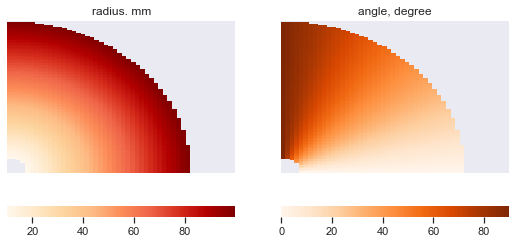

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

# Dados | units: mm, N, MPa
matE = 210e3
matv = 0.3
a = 500/2
b = 200/2
t = 9
R = 20/2 # interior radius
c = b # external radius
S0 = 300/t # N/mm/mm

def sigrr(r,t):
    return S0/2*((1-R**2/r**2) + (1+3*R**4/r**4 - 4*R**2/r**2)*np.cos(2*t))

def sigtt(r,t):
    return S0/2*((1+R**2/r**2) - (1+3*R**4/r**4)*np.cos(2*t))

def sigrt(r,t):
    return -S0/2*(1-3*R**4/r**4 + 2*R**2/r**2)*np.sin(2*t)

# Meshgrid
res = 100
xcoord = np.linspace(1e-9, a, res)
ycoord = np.linspace(1e-9, b, res)
xgrid, ygrid = np.meshgrid(xcoord, ycoord)
ygrid = np.flip(ygrid)
rgrid = np.sqrt(xgrid**2 + ygrid**2)
tgrid = np.arctan(ygrid/xgrid)

x0, y0, radius = 0.0, 0.0, R

x = rgrid*np.cos(tgrid)
y = rgrid*np.sin(tgrid)
r = np.sqrt((x - x0)**2 + (y - y0)**2)
mask = (r > radius) & (r < c)
M = np.ones(xgrid.shape)
M[~mask] = np.nan

Srr = sigrr(rgrid*M,tgrid*M)
Stt = sigtt(rgrid*M,tgrid*M)
Srt = sigrt(rgrid*M,tgrid*M)

# Maximum analytical stress
print('------------------------------------------')
print('Fator de intensidade de tensões teórico : ')
print('------------------------------------------')
Smax = sigtt(R,np.pi/2)
print(f'  S0 = {S0:3.1f} kN')
print(f'Smax = {Smax:3.1f} kN')
print(f'   K = Smax/S0 = {Smax/S0:3.1f}')

# Plots
Field1 = rgrid*M; Field1 = Field1[:,0:int(res/2)]
Field2 = tgrid*M; Field2 = Field2[:,0:int(res/2)]

fig = plt.figure(facecolor='w', edgecolor='k', figsize=(9,4))
ax1 = fig.add_subplot(1,2,1)
sns.heatmap(Field1, vmin=np.nanmin(Field1), vmax=np.nanmax(Field1),
                  cbar_kws={"orientation": "horizontal"}, cmap="OrRd")
ax1.set_title('radius. mm')
ax1.set_yticks([]); ax1.set_xticks([])
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('angle, degree')
sns.heatmap(np.rad2deg(Field2), cmap="Oranges",
                   xticklabels=False, yticklabels=False,
                   cbar_kws={"orientation": "horizontal"})
plt.show()

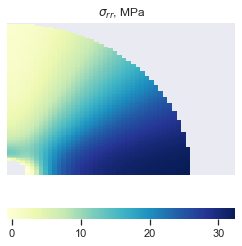

In [ ]:
def img_stress_fields(field,stg):

    fig = plt.figure(facecolor='w', edgecolor='k', figsize=(9,4))
    ax1 = fig.add_subplot(1,2,1)
    sns.set_theme()
    sns.heatmap(field, vmin=np.nanmin(field), vmax=np.nanmax(field),
                  cbar_kws={"orientation": "horizontal"}, cmap="YlGnBu")
    ax1.set_title(stg)
    ax1.set_yticks([]); ax1.set_xticks([])
    plt.show()

Field3 = Srr; Field3 = Field3[:,0:int(res/2)]
Field4 = Stt; Field4 = Field4[:,0:int(res/2)]
Field5 = Srt; Field5 = Field5[:,0:int(res/2)]

img_stress_fields(Field3,r'$\sigma_{rr}$, MPa')

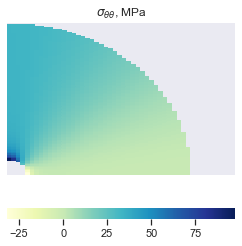

In [ ]:
img_stress_fields(Field4,r'$\sigma_{\theta\theta}$, MPa')

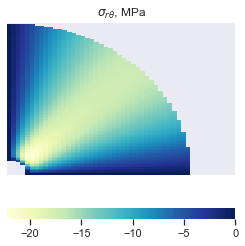

In [ ]:
img_stress_fields(Field5,r'$\sigma_{r\theta}$, MPa')

***
**<a name="Ponto1">2.</a> Utilizando o programa de elementos finitos ANSYS crie um modelo numérico da placa com furo.**

**a)** Obtenha o tensor das tensões nos pontos $P$, $A(0,R/2, 0)$ e $B(R/2,0,0)$. Compare os resultados com os obtidos através das equações analíticas utilizadas na alínea 1.f).

**b)** Faça uma avaliação do impacto das dimensões da placa e furo no valor do coeficiente de concentração de tensões $K$ [[4]](#Ref4). Comente os resultados.

_Nota: O código (tutorial) para a geração do modelo de elementos finitos (com recurso ao software comercial ANSYS) e instruções para a instalação do software estão disponíveis no [Apêndice A](#Ap.A)._

<img src="https://userweb.fct.unl.pt/~jmc.xavier/MSI/Notebooks/TP01/K.jpg" width="500" height="285">

O fator de concentração de tensões é frequentemente apresentado em tabelas ou gráficos com ajuste de funções polinomiais, considerando provetes de diversas geometrias. Para o problema da tração de placa com furo central, o fator de concentração de tensões é expresso analiticamente pela seguinte relação:

\begin{equation}
K_T = 3−3.14\frac{2r}{D}
+ 3.667\left(\frac{2r}{D}\right)^2−1.527\left(\frac{2r}{D}\right)^3
\end{equation}

em que

- $2r \equiv 2R$ : é o diâmetro do furo
- $D \equiv b$ : é a altura da placa

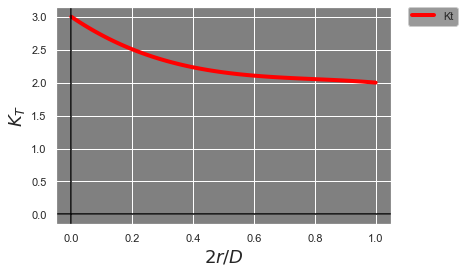

In [ ]:
def kana(dim2alt):
    return 3 - 3.14*(dim2alt) + 3.667*(dim2alt)**2 - 1.527*(dim2alt)**3

ratios = np.linspace(0,1,res)
KTana = kana(ratios)

font = {'size' : 15}
plt.rc('font', **font)
plt.rcParams['axes.facecolor']='gray'
plt.plot(ratios,KTana,linewidth=4,linestyle='-',color='red', label='Kt')
ax = plt.gca()
ax.axhline(y=0, color='black'), ax.axvline(x=0, color='black')
plt.xlabel(r"$2r/D$", size=18)
plt.ylabel(r"$K_T$", size=18)
plt.axis('tight')
plt.grid('on')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

***
**<a name="Ponto1">3.</a> Compare e discute os resultados com base nas análises analítica, numérica e experimental do problema de tração da placa com furo.**

_NOTA: Os dados experimentais são gerados por imagens sintéticas processados pela técnica de correlação digital de imagem ([Apêndice C](#Ap.C)) e serão fornecidos em anexo ([Apêndice B](#Ap.B)) em formato processado, i.e., como ficheiros ASCII (*.csv) com as matrizes das componentes do tensor das deformações._

**Campos de deformação obtidos pela técnica de Correlação Digital de Imagem**

> **$\varepsilon_{xx}$**

<img src="https://userweb.fct.unl.pt/~jmc.xavier/MSI/Notebooks/TP01/exx.png" width="500" height="350">

> **$\varepsilon_{yy}$**

<img src="https://userweb.fct.unl.pt/~jmc.xavier/MSI/Notebooks/TP01/eyy.png" width="500" height="350">

> **$\varepsilon_{xy}$**

<img src="https://userweb.fct.unl.pt/~jmc.xavier/MSI/Notebooks/TP01/exy.png" width="500" height="350">

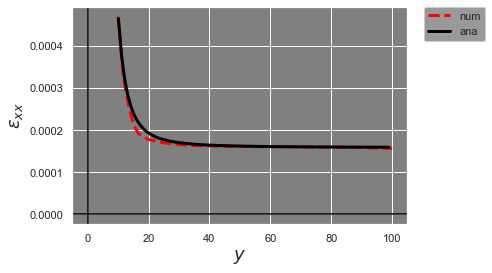

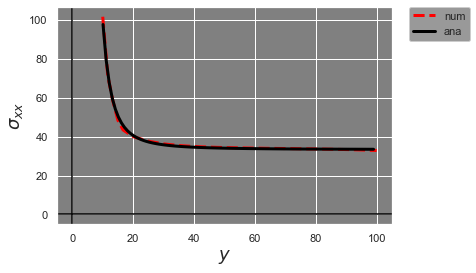

In [ ]:
pathdown = 'https://userweb.fct.unl.pt/~jmc.xavier/MSI/Notebooks/TP01/'
pathfem = pathdown + 'resFElinhacentro.csv'
FEMres = np.genfromtxt(pathfem, delimiter=';')
# Find the ordering of the first column (in increasing order)
ind = np.argsort(FEMres[:,0])
# Switch the ordering (so it's decreasing order)
# rind = ind[::-1]
# Return the matrix with rows in the specified order
FEMres = FEMres[ind]
fem_y = FEMres[:,0]
fem_exx = FEMres[:,1]
fem_sxx = FEMres[:,2]

def plotline(x1,y1,x2,y2,stgx,stgy):
    font = {'size' : 15}
    plt.rc('font', **font)
    plt.rcParams['axes.facecolor']='gray'
    plt.plot(x1,y1,linewidth=3,linestyle='--',color='red',label='num')
    plt.plot(x2,y2,linewidth=3,linestyle='-',color='black',label='ana')
    ax = plt.gca()
    ax.axhline(y=0, color='black'), ax.axvline(x=0, color='black')
    plt.xlabel(stgx, size=18)
    plt.ylabel(stgy, size=18)
    plt.axis('tight')
    plt.grid('on')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

xANA, yANAe, yANAs = ygrid[:,0], Stt[:,0]/matE, Stt[:,0]
plotline(fem_y,fem_exx,xANA,yANAe,r"$y$",r"$\epsilon_{xx}$")
plotline(fem_y,fem_sxx,xANA,yANAs,r"$y$",r"$\sigma_{xx}$")

### <a name="Ap.B">Apêndice B.</a> Dados experimentais da Correlação Digital de Imagem

_(Nota: a base para a obtenção dos dados experimentais da Correlação Digital de Imagem é apresentada no [Apêndice C](#Ap.C)._

Link para ficheiros de dados de CDI para o problema de tração de placa com furo:

_Coordenadas_

[x.csv](https://userweb.fct.unl.pt/~jmc.xavier/MSI/Notebooks/TP01/x_pic.csv)
$~-~$
[y.csv](https://userweb.fct.unl.pt/~jmc.xavier/MSI/Notebooks/TP01/u.csv)

_Deslocamentos_

[u.csv](https://userweb.fct.unl.pt/~jmc.xavier/MSI/Notebooks/TP01/u.csv)
$~-~$
[v.csv](https://userweb.fct.unl.pt/~jmc.xavier/MSI/Notebooks/TP01/u.csv)

_Deformações_

[exx.csv](https://userweb.fct.unl.pt/~jmc.xavier/MSI/Notebooks/TP01/exx.csv)
$~-~$
[eyy.csv](https://userweb.fct.unl.pt/~jmc.xavier/MSI/Notebooks/TP01/eyy.csv)
$~-~$
[exy.csv](https://userweb.fct.unl.pt/~jmc.xavier/MSI/Notebooks/TP01/exy.csv)

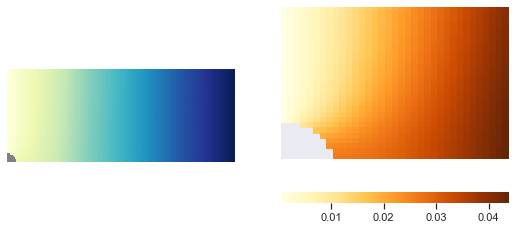

In [ ]:
import seaborn as sns

Vpixel = 1000 # unit: pixel
b2 = 200 # unit: mm
mm2pixel = b2/Vpixel

pathx = pathdown + 'x_pic.csv'
dic_x = mm2pixel*np.genfromtxt(pathx, delimiter=';')
dic_x = dic_x - dic_x[0,0] # shift data

pathy = pathdown + 'y_pic.csv'
dic_y = mm2pixel*np.genfromtxt(pathy, delimiter=';')
dic_y = dic_y - dic_y[0,0]

pathu = pathdown + 'u.csv'
dic_u = np.genfromtxt(pathu, delimiter=';')

pathv = pathdown + 'v.csv'
dic_v = np.genfromtxt(pathv, delimiter=';')

pathexx = pathdown + 'exx.csv'
dic_exx = np.genfromtxt(pathexx, delimiter=';')

patheyy = pathdown + 'eyy.csv'
dic_eyy = np.genfromtxt(patheyy, delimiter=';')

pathexy = pathdown + 'exy.csv'
dic_exy = np.genfromtxt(pathexy, delimiter=';')

def pltfield(field):

    fig = plt.figure(facecolor='w', edgecolor='k', figsize=(9,4))
    ax1 = fig.add_subplot(1,2,1)
    sns.set_theme()
    ax1 = sns.heatmap(field, vmin=np.nanmin(field), vmax=np.nanmax(field),
                      cbar=False, cmap="YlGnBu")
    ax1.set_aspect('equal')
    ax1.set_yticks([])
    ax1.set_xticks([])

    ax2 = fig.add_subplot(1,2,2)
    ax2 = sns.heatmap(field[50:-1,0:35], cmap="YlOrBr",
                      xticklabels=False, yticklabels=False,
                      cbar_kws={"orientation": "horizontal"})
    plt.show()

pltfield(dic_u)

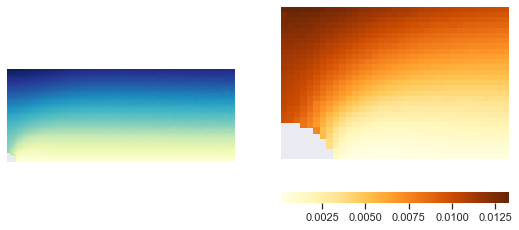

In [ ]:
pltfield(dic_v)

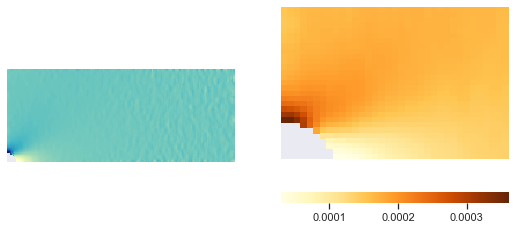

In [ ]:
pltfield(dic_exx)

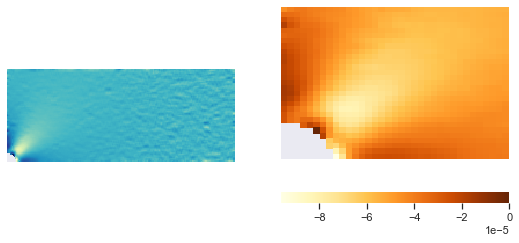

In [ ]:
pltfield(dic_eyy)

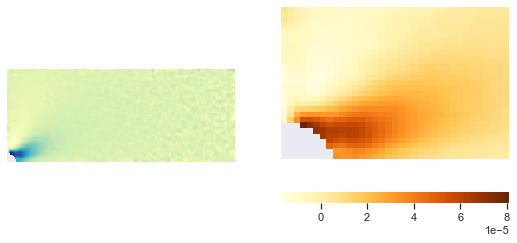

In [ ]:
pltfield(dic_exy)

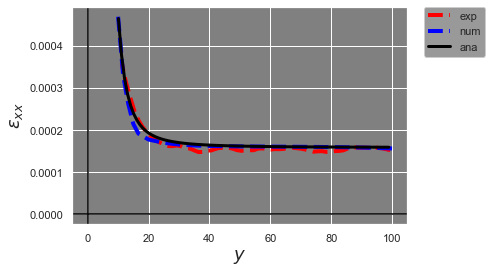

In [ ]:
# Comparacao numerico-experimental-analitico - exx
font = {'size' : 15}
plt.rc('font', **font)
plt.rcParams['axes.facecolor']='gray'
xDIC, yDIC = np.flip(dic_y[:,0]), dic_exx[:,0]
plt.plot(xDIC,yDIC,linewidth=4,linestyle='--',color='red', label='exp')
xFEM, yFEM = fem_y, fem_exx
plt.plot(xFEM,yFEM,linewidth=4,linestyle='--',color='blue', label='num')
xANA, yANA = ygrid[:,0], Stt[:,0]/matE
plt.plot(xANA,yANA,linewidth=3,linestyle='-',color='black', label='ana')
ax = plt.gca()
ax.axhline(y=0, color='black'), ax.axvline(x=0, color='black')
plt.xlabel(r"$y$", size=18)
plt.ylabel(r"$\epsilon_{xx}$", size=18)
plt.axis('tight')
plt.grid('on')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

### <a name="Ap.C">Apêndice C.</a> Determinação do campo de deformações a partir do campo de deslocamentos

_(O Apêndice C mostra os fundamentos para a obtenção do campo de deformações, base para a aplicação experimental da técnica de Correlação Digital de Imagem [[5]](#Ref5).)_

O tensor de deformação é uma quantidade cinemática fundamental em mecânica dos sólidos. Este tensor é necessário, nomeadamente, para a caraterização do comportamento mecânico dos materiais pela relação da lei constitutiva.

As componentes do campo vetorial de deformação podem ser obtidas diretamente a partir dos campos de deslocamento determinados pela técnica de correlação digital de imagem:

\begin{equation}
I(x,y) \quad\longrightarrow\quad \vec{u}(x,y)
\quad\longrightarrow\quad \tilde{\varepsilon}(x,y)
\end{equation}

De acordo com a relação deformação-deslocamento, esta operação envolve derivação numérica. Assumindo, por hipótese, a teoria de deformações infinitesimais:

\begin{equation}
\varepsilon_{ij} = \frac{1}{2}\left(\frac{\partial u_i}{\partial x_j}  +
\frac{\partial u_j}{\partial x_i} \right)
\end{equation}

Existem vários algoritmos para a implementação computacional deste cálculo, eventualmente classificados em métodos globais e locais, para a determinação do estado de deformação num ponto em análise. Estes seguem, contudo, um padrão semelhante que consiste em aproximar o campo de deslocamentos medido por uma função polinomial bidimensional, e a posterior derivação analítica desta. Numa primeira etapa, para um certo ponto de interesse $(x_0,y_0)$, é escolhida uma janela de pontos vizinhos - na malha regular do campo de deslocamentos - a usar na aproximação numérica. Estes dados experimentais podem, por exemplo, ser aproximados por funções polinomiais de Lagrange, bilinear ou biquadrática. A título de exemplo, dá-se a seguir a expressão do polinomial de Lagrange bilinear ($Q4$):

\begin{equation}
\begin{cases}
u^{Q4}(x_0,y_0) = a_{00} + a_{10}
x_0 + a_{01} y_0 + a_{11} x_0 y_0 \\
v^{Q4}(x_0,y_0) = b_{00} + b_{10}
x_0 + b_{01} y_0 + b_{11} x_0 y_0
\end{cases} \end{equation}

A aproximação bilinear permite prever uma transformação afim ou homogénea da uma região de interesse. Os coeficientes dos polinómios ($a_{00}, \ldots, b_{00},  \ldots$) devem ser obtidos resolvendo o problema da regressão linear pelo método dos mínimos quadrados.

A matriz do tensor gradiente da transformação ou de deformação, $\widetilde{F}(\vec{X},t)$, representado num determinado sistema de coordenadas, pode assim ser matricialmente definido por [[6]](#Ref6):

\begin{equation}
	\widetilde{F}(\vec{X},t) =
	\frac{\partial \vec{x}(\vec{X},t)}{\partial \vec{X}}  =
	(\vec{\nabla}_0\vec{x})^T = (\vec{\nabla}_0\widetilde{u}(\vec{X},t) +
	\widetilde{I})^T =
	\begin{bmatrix} 1 + \displaystyle\frac{\partial u}{\partial x} &
	\displaystyle\frac{\partial u}{\partial y} \\
	\displaystyle\frac{\partial v}{\partial x} & 1 +
	\displaystyle\frac{\partial v}{\partial y}
	\end{bmatrix}
\end{equation}

com,

\begin{equation}
\widetilde{F}^{Q4} = \begin{bmatrix} 1 + a_{10} +
a_{11} y_0 & a_{01} + a_{11} x_0 \\ b_{10} + b_{11}y0 & 1 + b_{01} +
	b_{11}x_0 \end{bmatrix}
\end{equation}

O gradiente de deformação $\widetilde{F}(\vec{X},t)$ é usado em várias medidas da deformação como o tensor de deformação de Cauchy–Green $(\widetilde{C} = \widetilde{F}^T\cdot\widetilde{F})$, ou o tensor de deformação de Green–Lagrange ($\widetilde{E}=(\widetilde{F}^T\widetilde{F} - \widetilde{I})/2$).

<br>

_Convergência dos parâmetros de CD:_

É importante salientar que a resolução espacial em deformação associada à dimensão da janela de correlação usada na aproximação das funções de Lagrange, para a reconstrução do campo de deformações, é também função da janela de correlação $j_c$, bem como do nível de sobreposição entre janelas adjacentes $j_s$, definido no método de correlação digital de imagem.

Para a escolha de uma determinada distância entre janelas de correlação de $j_s$ e para uma distância de janela de deformação $d_\varepsilon = N \times N$, a determinação do estado de deformação num ponto ocorre como uma média sobre uma região quadrada de dimensão física dada por $[(N-1)\times j_s ]+1$. O cálculo da deformação num ponto deve ainda incorporar a dimensão de uma janela de correlação, $j_c$, para a qual se obtém uma medida independente do vetor deslocamento levando à definição de uma quantidade designada por extensómetro virtual ($EV$) defino por:

\begin{equation}
EV = [(d_\varepsilon-1)\times j_s] + j_c
\end{equation}

O valor de $EV$ deve ser cuidadosamente escolhido para cada tipo de aplicação, pois ele determina a resolução espacial em deformação associada às medidas. Quanto maior for a dimensão de $EV$, mais suaves (filtrados) serão os resultados. Para problemas conduzindo a um estados de deformação relativamente uniformes pode-se usar valores de dimensão superior para o $EV$, em relação às dimensões da região de interesse. No entanto, para problemas com gradientes de deformaçáo (e.g. num provete com um entalhe ou furo), o sinal da deformação poderá ser sustancialmente subestimado se se considerar um valor demasiado importante para $EV$, em relação a esses detalhes geométricos.

### Referências bibliográficas

[1] <a href="https://www.youtube.com/watch?v=U9FTmAZK6Yo&list=PLKcZQf9eLl4mohvUHs9l_d8wVspgAOqQc&index=2" target="_blank" name="Ref1" > <span
style="color:#333399"> GOM Correlate Video Tutorial - 2 - Object Preparation and 2D Image Acquisition </span> </a> Acedido a 8 abril 2022. <a name="Ref1"></a>

[2] <a href="https://moodle.fct.unl.pt/pluginfile.php/473469/mod_resource/content/1/reddy_cap7_AiryFunc.pdf" target="_blank"> <span
style="color:#333399"> J.N. Reddy (2008). An Introduction to Continuum Mechanics, Cambridge University Press, Cap.7 (sec.7.7.4). </span> </a> <a name="Ref2"></a>

[3] <a href="https://moodle.fct.unl.pt/pluginfile.php/470557/mod_resource/content/1/Acetatos_Relacoes_Tensao_Deformacao.pdf" target="_blank"> <span
style="color:#333399"> Notas de apoio - Relação tensão-deformação (MS1, NOVA FCT). </span> </a> <a name="Ref3"></a>

[4] <a href="https://moodle.fct.unl.pt/pluginfile.php/472254/mod_resource/content/1/Hibbeler%2C%20Mechanics%20of%20Materials%2C%20Prentice%20Hall%20cap4.pdf" target="_blank"> <span
style="color:#333399"> R.C. Hibbeler, Mechanics of Materials, Prentice Hall, Cap.4 (pp.160-163) </span> </a> <a name="Ref4"></a>

[5] <a href="https://www.matchid.eu" target="_blank"> <span
style="color:#333399"> MatchID. </span> </a> Acedido a 8 abril 2022. <a name="Ref5"></a>

[6] <a href="https://moodle.fct.unl.pt/pluginfile.php/469099/mod_resource/content/2/J.%20N.%20Reddy%20-%20An%20introduction%20to%20continuum%20mechanics_%20with%20applications-Cambridge%20University%20Press%20(2008).pdf" target="_blank"> <span
style="color:#333399"> J.N. Reddy (2008). An Introduction to Continuum Mechanics, Cambridge University Press, Cap.3. </span> </a> <a name="Ref6"></a>


